In [1]:
%pylab inline
import pandas as pd
import matplotlib.ticker as mtick
import os


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:

# Check if the CSV file exists
csv_file = 'august_hourly_prices_by_year.csv'
if not os.path.exists(csv_file):
    print(f"Error: Could not find the file {csv_file}")
    print("Please run august_hourly_prices.py first to generate the data.")
    exit(1)

# Read the yearly hourly price data
print(f"Reading data from {csv_file}...")
yearly_data = pd.read_csv(csv_file)

# Get year range and count for plot titles
start_year = yearly_data['year'].min()
end_year = yearly_data['year'].max()
year_count = yearly_data['year'].nunique()
print(f"Analysis includes {year_count} years of data from {start_year} to {end_year}")

# Calculate average price for each hour across all years
hourly_avg = yearly_data.groupby('hour')['Settlement Point Price'].agg(
    ['mean', 'std', 'min', 'max']).reset_index()
hourly_avg.columns = ['hour', 'Settlement Point Price', 'std', 'min', 'max']


Reading data from august_hourly_prices_by_year.csv...
Analysis includes 13 years of data from 2011 to 2024


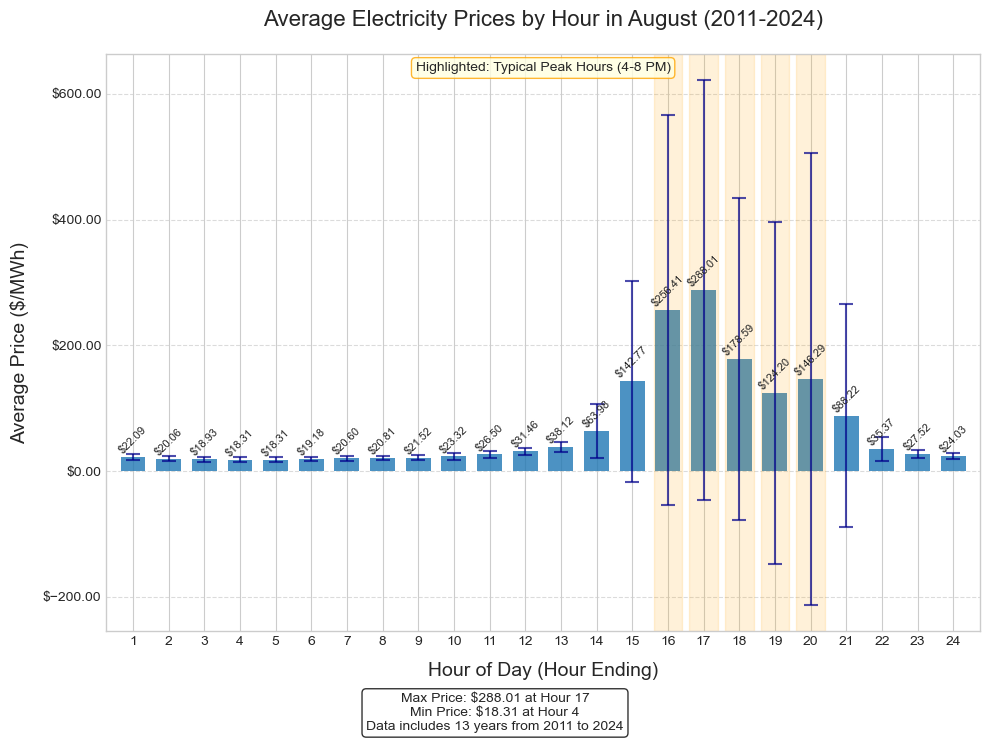

In [9]:

# Create a figure with better styling for the overall average
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot average prices as bars
bars = ax.bar(hourly_avg['hour'], hourly_avg['Settlement Point Price'], 
       color='#1f77b4', alpha=0.8, width=0.7)

# Add error bars showing standard deviation
ax.errorbar(hourly_avg['hour'], hourly_avg['Settlement Point Price'], 
           yerr=hourly_avg['std'], fmt='none', color='darkblue', 
           capsize=5, capthick=1.5, elinewidth=1.5, alpha=0.7)

# Add data labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'${height:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)

# Customize plot appearance
ax.set_title(f'Average Electricity Prices by Hour in August ({start_year}-{end_year})', fontsize=16, pad=20)
ax.set_xlabel('Hour of Day (Hour Ending)', fontsize=14, labelpad=10)
ax.set_ylabel('Average Price ($/MWh)', fontsize=14, labelpad=10)
ax.set_xticks(range(1, 25))
ax.set_xlim(0.25, 24.75)

# Format y-axis with dollar signs
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight peak hours (typically afternoon/evening)
peak_hours = list(range(16, 21))  # 4pm - 8pm
for hour in peak_hours:
    ax.axvspan(hour-0.4, hour+0.4, alpha=0.15, color='orange')

# Add a note about peak hours
ax.text(0.5, 0.97, "Highlighted: Typical Peak Hours (4-8 PM)", 
        transform=ax.transAxes, ha='center', fontsize=10, 
        bbox=dict(boxstyle="round,pad=0.3", fc='lightyellow', ec='orange', alpha=0.8))

# Add statistics in the figure
stats_text = (f"Max Price: ${hourly_avg['Settlement Point Price'].max():.2f} at Hour {hourly_avg.loc[hourly_avg['Settlement Point Price'].idxmax(), 'hour']}\n"
             f"Min Price: ${hourly_avg['Settlement Point Price'].min():.2f} at Hour {hourly_avg.loc[hourly_avg['Settlement Point Price'].idxmin(), 'hour']}\n"
             f"Data includes {year_count} years from {start_year} to {end_year}")

plt.figtext(0.5, -0.05, stats_text, ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save the plot in higher resolution
# plt.savefig('august_hourly_prices.png', dpi=300, bbox_inches='tight')
# print("Saved overall average plot to august_hourly_prices.png")

# Save a PDF version too
# plt.savefig('august_hourly_prices.pdf', bbox_inches='tight')
# print("Saved overall average plot to august_hourly_prices.pdf")
plt.show()

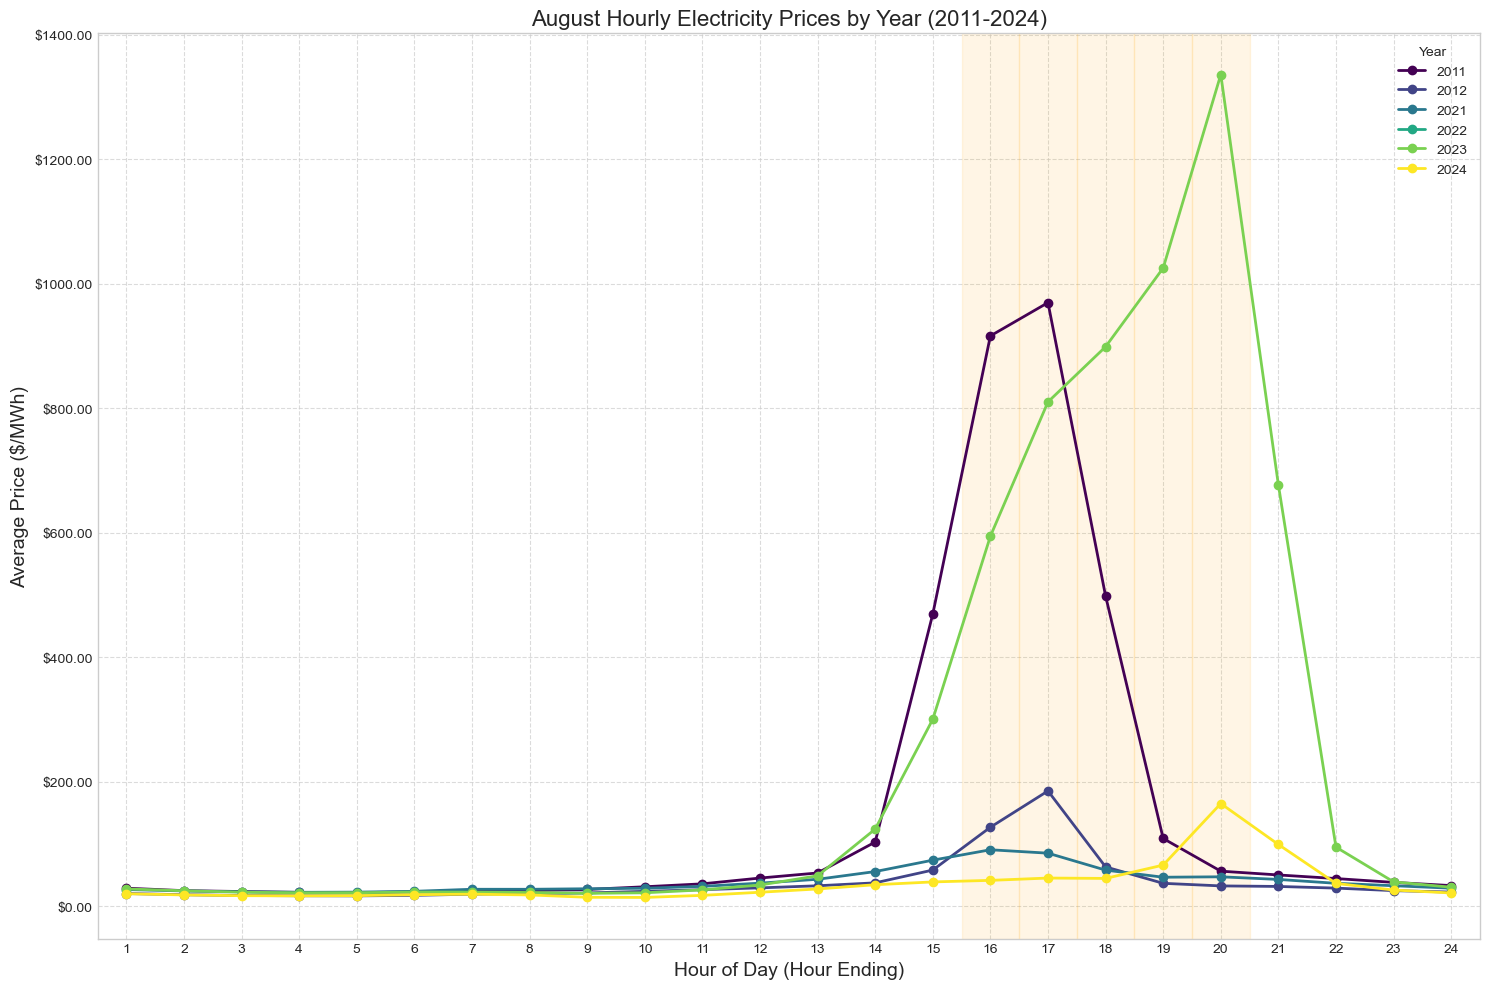

In [10]:

# Create a second plot showing year-by-year comparison
plt.figure(figsize=(15, 10))

# Get unique years and create a colormap
unique_years = sorted(yearly_data['year'].unique())
unique_years = [2011, 2012, 2021, 2022, 2023, 2024]
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))

# Plot each year as a separate line
for i, year in enumerate(unique_years):
    year_data = yearly_data[yearly_data['year'] == year]
    plt.plot(year_data['hour'], year_data['Settlement Point Price'], 
             marker='o', linestyle='-', linewidth=2, 
             label=str(year), color=colors[i])

# Add labels and title
plt.title(f'August Hourly Electricity Prices by Year ({start_year}-{end_year})', fontsize=16)
plt.xlabel('Hour of Day (Hour Ending)', fontsize=14)
plt.ylabel('Average Price ($/MWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis with dollar signs
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))

# Set x-ticks and limits
plt.xticks(range(1, 25))
plt.xlim(0.5, 24.5)

# Highlight peak hours
for hour in peak_hours:
    plt.axvspan(hour-0.5, hour+0.5, alpha=0.1, color='orange')

# Add a legend with better placement
if len(unique_years) > 7:
    # For many years, put the legend to the right of the plot
    plt.legend(title='Year', bbox_to_anchor=(1.02, 0.5), loc='center left', fontsize=10)
    plt.subplots_adjust(right=0.85)  # Make room for the legend
else:
    # For fewer years, put the legend in the top right
    plt.legend(title='Year', loc='upper right', fontsize=10)

plt.tight_layout()

# Save the yearly comparison plot
# plt.savefig('august_hourly_prices_by_year.png', dpi=300, bbox_inches='tight')
# print("Saved yearly comparison plot to august_hourly_prices_by_year.png")

# plt.savefig('august_hourly_prices_by_year.pdf', bbox_inches='tight')
# print("Saved yearly comparison plot to august_hourly_prices_by_year.pdf")

# Show the plots
plt.show()


In [12]:
yearly_data.columns


Index(['year', 'hour', 'Settlement Point Price', 'ERCOT'], dtype='object')

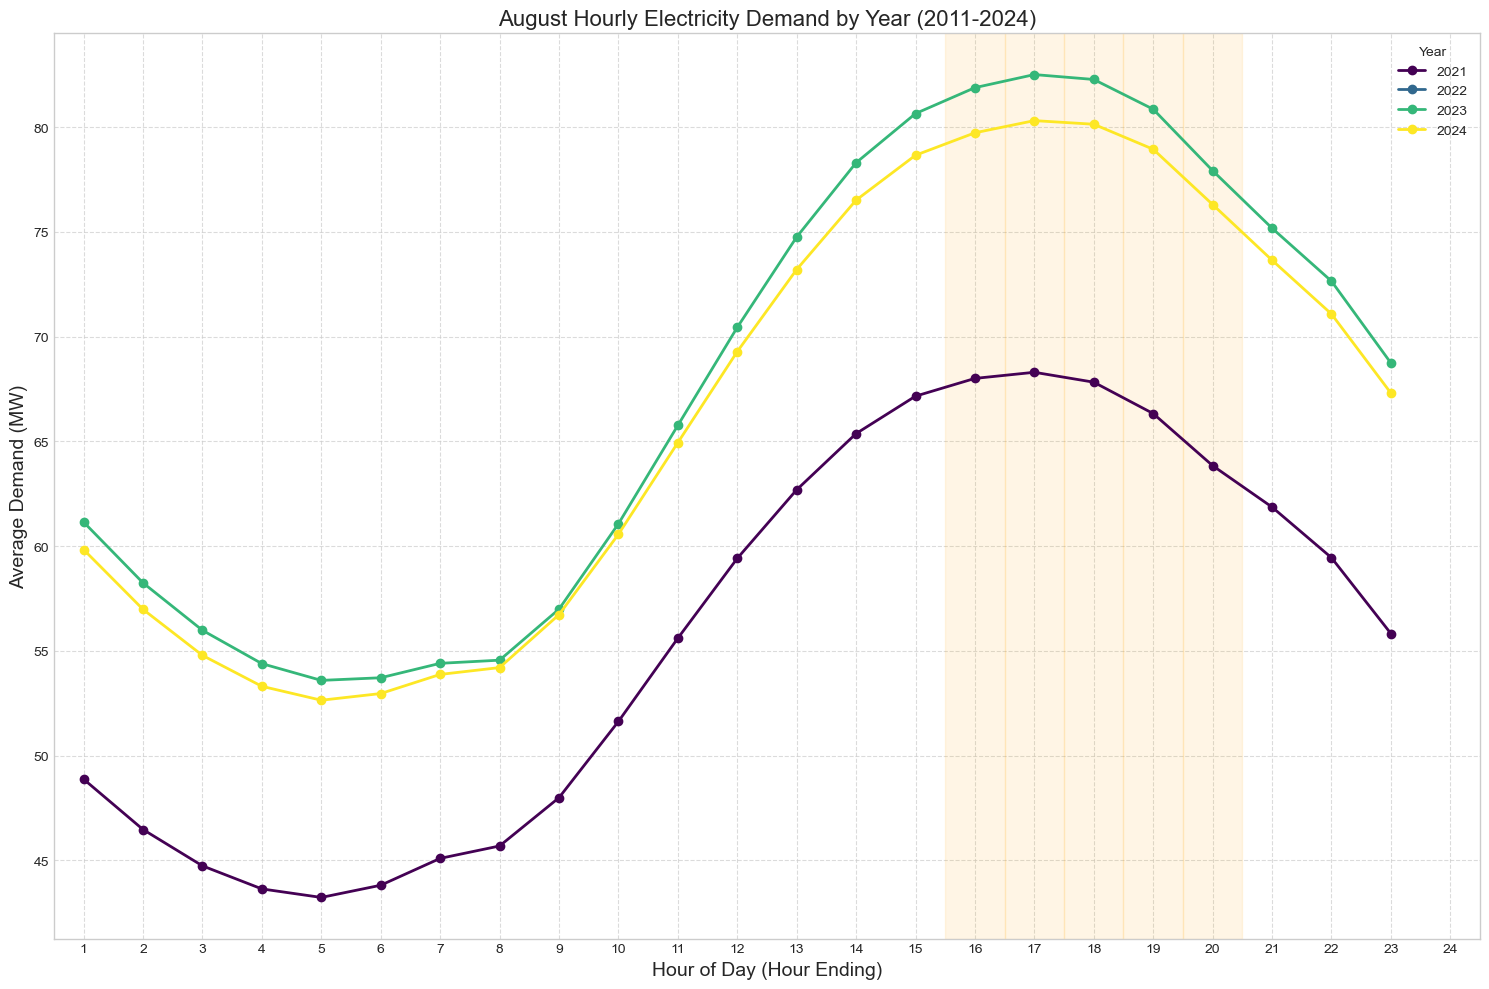

In [14]:
# Create a second plot showing year-by-year comparison
plt.figure(figsize=(15, 10))

# Get unique years and create a colormap
unique_years = sorted(yearly_data['year'].unique())
unique_years = [2021, 2022, 2023, 2024]
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))

# Plot each year as a separate line
for i, year in enumerate(unique_years):
    year_data = yearly_data[yearly_data['year'] == year]
    plt.plot(year_data['hour'], year_data['ERCOT'], 
             marker='o', linestyle='-', linewidth=2, 
             label=str(year), color=colors[i])

# Add labels and title
plt.title(f'August Hourly Electricity Demand by Year ({start_year}-{end_year})', fontsize=16)
plt.xlabel('Hour of Day (Hour Ending)', fontsize=14)
plt.ylabel('Average Demand (MW)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks and limits
plt.xticks(range(1, 25))
plt.xlim(0.5, 24.5)

# Highlight peak hours
for hour in peak_hours:
    plt.axvspan(hour-0.5, hour+0.5, alpha=0.1, color='orange')

# Add a legend with better placement
if len(unique_years) > 7:
    # For many years, put the legend to the right of the plot
    plt.legend(title='Year', bbox_to_anchor=(1.02, 0.5), loc='center left', fontsize=10)
    plt.subplots_adjust(right=0.85)  # Make room for the legend
else:
    # For fewer years, put the legend in the top right
    plt.legend(title='Year', loc='upper right', fontsize=10)

plt.tight_layout()

# Save the yearly comparison plot
# plt.savefig('august_hourly_demand_by_year.png', dpi=300, bbox_inches='tight')
# print("Saved yearly comparison plot to august_hourly_demand_by_year.png")

# plt.savefig('august_hourly_demand_by_year.pdf', bbox_inches='tight')
# print("Saved yearly comparison plot to august_hourly_demand_by_year.pdf")

# Show the plots
plt.show()


Hour with highest price in each year:
     year  hour  Settlement Point Price
16   2011    17              969.523871
40   2012    17              185.188387
64   2013    17              108.141935
88   2014    17               96.837742
112  2015    17              251.167742
135  2016    16               85.507742
159  2017    16               53.723871
184  2018    17               75.204516
207  2019    16              836.199355
232  2020    17              185.867419
255  2021    16               90.703548
280  2022    17              194.554194
307  2023    20             1335.861290
331  2024    20              164.936452


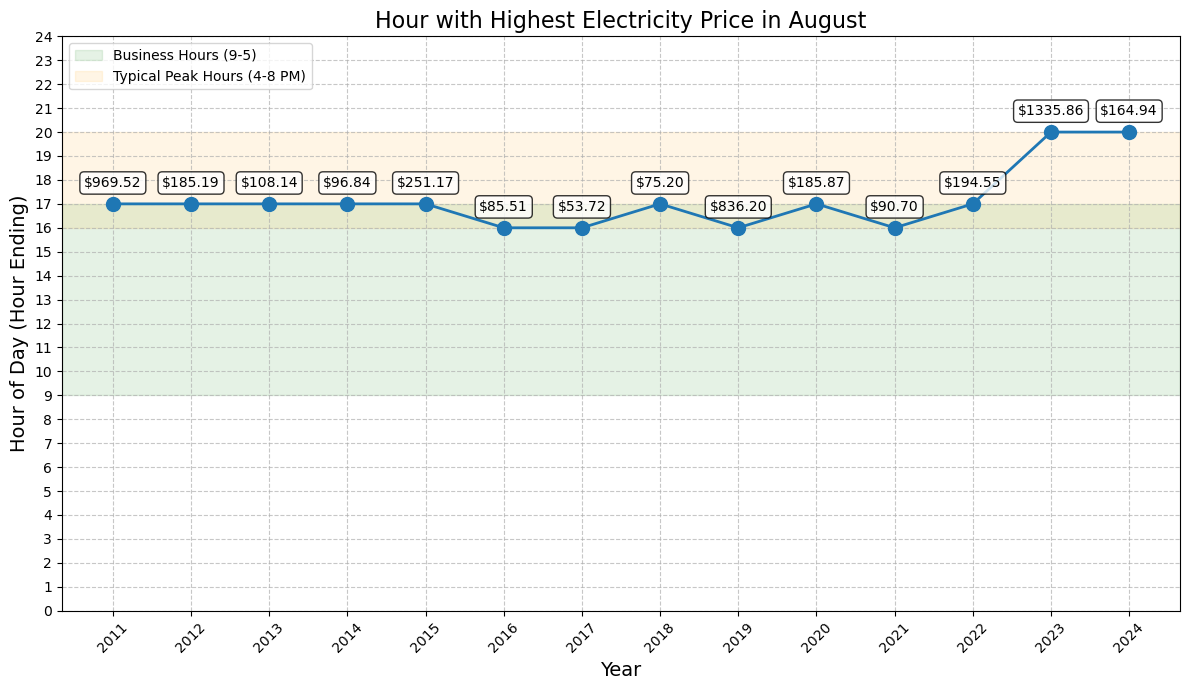

In [4]:
# Find hour with highest price for each year
highest_hour_by_year = yearly_data.loc[yearly_data.groupby('year')['Settlement Point Price'].idxmax()]
highest_hour_by_year = highest_hour_by_year[['year', 'hour', 'Settlement Point Price']]

# Display the results in a table
print("Hour with highest price in each year:")
print(highest_hour_by_year.sort_values('year'))

# Create a figure for plotting
plt.figure(figsize=(12, 7))

# Plot the hour of highest cost vs year
plt.plot(highest_hour_by_year['year'], highest_hour_by_year['hour'], 
         marker='o', markersize=10, linewidth=2, color='#1f77b4')

# Add data labels showing the peak price
for i, row in highest_hour_by_year.iterrows():
    plt.annotate(f"${row['Settlement Point Price']:.2f}", 
                 xy=(row['year'], row['hour']),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

# Add horizontal reference lines for business hours
plt.axhspan(9, 17, alpha=0.1, color='green', label='Business Hours (9-5)')

# Add horizontal reference lines for peak demand hours
plt.axhspan(16, 20, alpha=0.1, color='orange', label='Typical Peak Hours (4-8 PM)')

# Customize plot appearance
plt.title('Hour with Highest Electricity Price in August', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Hour of Day (Hour Ending)', fontsize=14)
plt.xticks(highest_hour_by_year['year'], rotation=45)
plt.yticks(range(0, 25))
plt.ylim(0, 24)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

# Add a text explanation
explanation = "This chart shows which hour of the day had the highest\naverage electricity price in August of each year."
# plt.figtext(0.5, -0.05, explanation, ha='center', fontsize=10, 
#             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save the plot
# plt.savefig('august_peak_hour_by_year.png', dpi=300, bbox_inches='tight')
# print("Saved peak hour analysis to august_peak_hour_by_year.png")

plt.show()